## Ideas
* Display what one MW is -- exampples: https://www.vivintsolar.com/blog/what-is-a-megawatt-hour

In [176]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [177]:
#Import files
energy_csv = "resources/energy_dataset.csv"
weather_csv = "resources/weather_features.csv"
energy_df = pd.read_csv(energy_csv)
weather_df = pd.read_csv(weather_csv)

# Merge DataFrames into one (big_df)
big_df = pd.merge(energy_df, weather_df, on="time")

## Main DataFrame

In [196]:
# Select only necessary columns for a better DataFrame (better_big_df)
better_big_df = pd.DataFrame({
    "Time":big_df["time"],
    "Month":big_df["month"],
    "Day":big_df["day"],
    "Year":big_df["year"],
    "Oil":big_df["generation fossil oil"],
    "Hydro River/Resivoir":big_df["generation hydro run-of-river and poundage"] + big_df["generation hydro water reservoir"],
    "Solar":big_df["generation solar"],
    "Nuclear":big_df["generation nuclear"],
    "City":big_df["city_name"],
    "Temp (F)":round(big_df["temp"]*(9/5)-459.67,2), # converting kelvin to fahrenheit
    "Rain (mm)":big_df["rain_3h"],
    "Snow (mm)":big_df["snow_3h"],
    "Clouds":big_df["clouds_all"],
    "Weather Description":big_df["weather_main"]})

# Preivew summary
# better_big_df.count()

In [195]:
# Drop any missing data
smaller_better_big_df = better_big_df.dropna(how='any')

# Dataframe without missing data
smaller_better_big_df.count()

Time                    178296
Month                   178296
Day                     178296
Year                    178296
Oil                     178296
Hydro River/Resivoir    178296
Solar                   178296
Nuclear                 178296
City                    178296
Temp (F)                178296
Rain (mm)               178296
Snow (mm)               178296
Clouds                  178296
Weather Description     178296
dtype: int64

### Adding Seasons to DataFrame

In [193]:
seasons = []

# Loop through Month data to assign season name
for month in smaller_better_big_df["Month"]:
    if month <= 2 or month == 12:
        seasons.append("4-Winter")
    if month >= 3 and month <= 5:
        seasons.append("1-Spring")
    if month >= 6 and month <= 8:
        seasons.append("2-Summer")
    if month >= 9 and month <= 11:
        seasons.append("3-Fall")

# Add Seasons to DataFrame
smaller_better_big_df["Season"] = seasons

# Preview
# smaller_better_big_df.head()

<hr>

# Spain's Energy Production Summary

In [181]:
# Create Dataframe for total production
# De-duped DataFrame by calling 1 city (Madrid)
production_df = smaller_better_big_df.loc[better_big_df["City"]=="Madrid"]

# Preview
production_df.head()

,Time,Month,Day,Year,Oil,Hydro River/Resivoir,Solar,Nuclear,City,Temp (F),Rain (mm),Snow (mm),Clouds,Weather Description,Season
1,2015-01-01 00:00:00+01:00,1,1,2015,162.0,2950.0,49.0,7096.0,Madrid,21.51,0.0,0.0,0,clear,4-Winter
6,2015-01-01 01:00:00+01:00,1,1,2015,158.0,2667.0,50.0,7096.0,Madrid,21.51,0.0,0.0,0,clear,4-Winter
11,2015-01-01 02:00:00+01:00,1,1,2015,157.0,2344.0,50.0,7099.0,Madrid,19.46,0.0,0.0,0,clear,4-Winter
16,2015-01-01 03:00:00+01:00,1,1,2015,160.0,1728.0,50.0,7098.0,Madrid,19.46,0.0,0.0,0,clear,4-Winter
21,2015-01-01 04:00:00+01:00,1,1,2015,156.0,1673.0,42.0,7097.0,Madrid,19.46,0.0,0.0,0,clear,4-Winter


### Energy prodcution types

In [197]:
# Calculate total energy for each production type 
energy_type = production_df[["Oil","Hydro River/Resivoir","Solar","Nuclear"]].sum()
energy_type

Oil                      10800408.0
Hydro River/Resivoir    130188753.0
Solar                    51775492.0
Nuclear                 226969046.0
dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

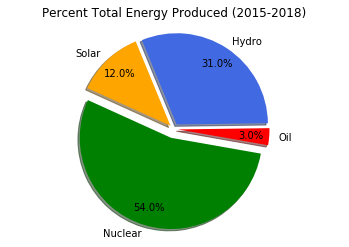

In [198]:
# Total energy produced 2015-2018
total_energy_sum = energy_type.sum()

# Percent values for each energy production between 2015-2018
oil_percent = round(energy_type[0]/total_energy_sum,2)*100
hydro_percent = round(energy_type[1]/total_energy_sum,2)*100
solar_percent = round(energy_type[2]/total_energy_sum,2)*100
nuclear_percent = round(energy_type[3]/total_energy_sum,2)*100

# Plot variables
percents = [oil_percent,hydro_percent,solar_percent,nuclear_percent]
labels = ["Oil","Hydro","Solar","Nuclear"]
color = ["red","royalblue","orange","green"]

# Percent of energy production by type from 2015-2018
explode = (0.05, 0.06, 0.05, 0.1)
plt.pie(percents,labels=labels,colors=color,autopct="%1.1f%%",pctdistance=.8,radius=1,shadow=True,explode=explode,startangle=350)
plt.title("Percent Total Energy Produced (2015-2018)")
plt.axis("equal")

plt.show

### Spain's energy prodcution vs forecast

In [199]:
# Average energy prodcution by weather description (2015-2018)
weather_desc = smaller_better_big_df.groupby("Weather Description")["Oil","Hydro River/Resivoir","Solar","Nuclear"].mean()
weather_desc

,Oil,Hydro River/Resivoir,Solar,Nuclear
Weather Description,,,,
clear,299.068279,3432.385896,1424.505440,6250.743583
clouds,298.550244,3697.507526,1560.444640,6269.021932
drizzle,293.254640,3807.633411,1167.790023,6189.147912
dust,320.792507,3701.175793,1491.726225,6594.783862
fog,285.186353,3490.924581,918.142059,6269.790503
haze,290.949425,3118.737931,364.317241,6363.988506
mist,287.920676,3374.267400,937.701638,6288.136643
rain,296.782351,3865.917108,1171.143219,6306.332604
smoke,321.090909,3306.696970,415.969697,5614.424242


<function matplotlib.pyplot.show(*args, **kw)>

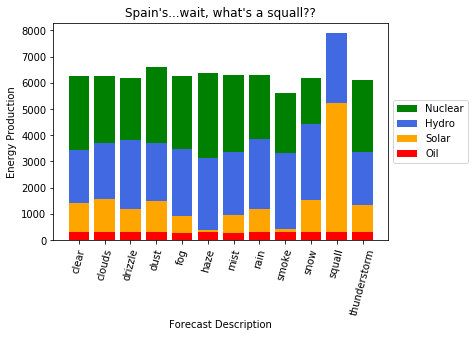

In [227]:
# Create weather description bar chart
x_limit_desc = np.arange(0,len(weather_desc),1)
foreceast = ["clear","clouds","drizzle","dust","fog","haze","mist","rain","smoke","snow","squall","thunderstorm"]
# Plot each energy type
plt.bar(x_limit_desc,weather_desc["Nuclear"], color="green", label="Nuclear")
plt.bar(x_limit_desc,weather_desc["Hydro River/Resivoir"], color="royalblue", label="Hydro")
plt.bar(x_limit_desc,weather_desc["Solar"], color="orange", label="Solar")
plt.bar(x_limit_desc,weather_desc["Oil"], color="red", label="Oil")

plt.title("Spain's...wait, what's a squall??")
plt.xlabel("Forecast Description")
plt.ylabel("Energy Production")
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), fancybox=True)

tick_locations = [value for value in x_limit_desc]
plt.xticks(tick_locations, foreceast, rotation=75)

plt.show

### Energy prodcution vs forecast description*
* *SQUALL OUTLIER RESOLVED

In [187]:
# Average energy prodcution by weather description (2015-2018) - NO SQUALL ¯\_(ツ)_/¯
weather_desc_nosqaull = weather_desc
weather_desc_nosqaull = weather_desc_nosqaull.drop("squall", axis=0)
weather_desc_nosqaull

,Oil,Hydro River/Resivoir,Solar,Nuclear
Weather Description,,,,
clear,299.068279,3432.385896,1424.505440,6250.743583
clouds,298.550244,3697.507526,1560.444640,6269.021932
drizzle,293.254640,3807.633411,1167.790023,6189.147912
dust,320.792507,3701.175793,1491.726225,6594.783862
fog,285.186353,3490.924581,918.142059,6269.790503
haze,290.949425,3118.737931,364.317241,6363.988506
mist,287.920676,3374.267400,937.701638,6288.136643
rain,296.782351,3865.917108,1171.143219,6306.332604
smoke,321.090909,3306.696970,415.969697,5614.424242


<function matplotlib.pyplot.show(*args, **kw)>

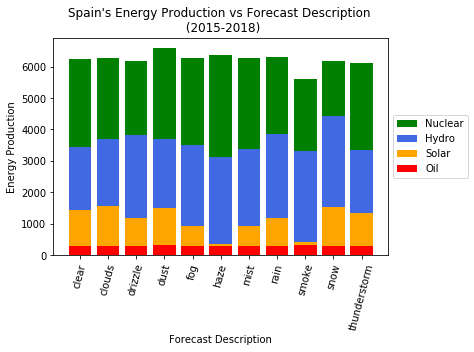

In [213]:
# Create weather description bar chart (no squall)
x_limit_desc_2 = np.arange(0,len(weather_desc_nosqaull),1)
foreceast = ["clear","clouds","drizzle","dust","fog","haze","mist","rain","smoke","snow","thunderstorm"]

# Plot each energy type
plt.bar(x_limit_desc_2,weather_desc_nosqaull["Nuclear"], color="green", label="Nuclear")
plt.bar(x_limit_desc_2,weather_desc_nosqaull["Hydro River/Resivoir"], color="royalblue", label="Hydro")
plt.bar(x_limit_desc_2,weather_desc_nosqaull["Solar"], color="orange", label="Solar")
plt.bar(x_limit_desc_2,weather_desc_nosqaull["Oil"], color="red", label="Oil")

plt.title("Spain's Energy Production vs Forecast Description \n (2015-2018)")
plt.xlabel("Forecast Description")
plt.ylabel("Energy Production")
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), fancybox=True)

tick_locations = [value for value in x_limit_desc_2]
plt.xticks(tick_locations, foreceast, rotation=75)

plt.show

<hr>

# Madrid

In [202]:
# Create Dataframe for Madrid
madrid_df = smaller_better_big_df.loc[better_big_df["City"]=="Madrid"]

# Preview
# madrid_df.head()

### Energy prodcution vs forecast description

In [203]:
# Average energy prodcution by weather description (2015-2018)
weather_desc_mad = madrid_df.groupby("Weather Description")["Oil","Hydro River/Resivoir","Solar","Nuclear"].mean()
weather_desc_mad

,Oil,Hydro River/Resivoir,Solar,Nuclear
Weather Description,,,,
clear,299.805644,3357.307832,1533.499533,6273.886573
clouds,298.202875,3875.729186,1377.882541,6260.583537
drizzle,287.855573,3880.646782,957.514914,6137.736264
fog,278.980226,3958.902542,1265.884181,6200.987288
haze,315.500000,5754.055556,1245.388889,6662.666667
mist,285.125800,3611.668443,1081.743070,6282.576759
rain,294.299435,4038.500565,1070.088136,6229.286629
snow,297.556818,4938.386364,2522.034091,6113.363636
thunderstorm,304.626126,3315.175676,1423.067568,6079.202703


<function matplotlib.pyplot.show(*args, **kw)>

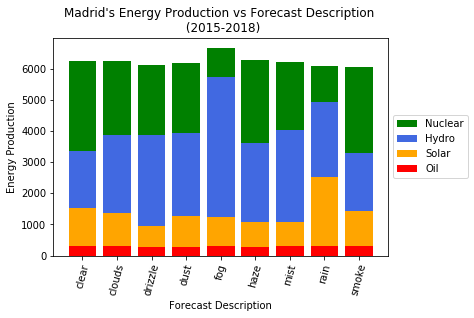

In [212]:
# Create weather description bar chart
x_limit_desc_mad = np.arange(0,len(weather_desc_mad),1)
foreceast = ["clear","clouds","drizzle","dust","fog","haze","mist","rain","smoke","snow","thunderstorm"]

# Plot each energy type
plt.bar(x_limit_desc_mad,weather_desc_mad["Nuclear"], color="green", label="Nuclear")
plt.bar(x_limit_desc_mad,weather_desc_mad["Hydro River/Resivoir"], color="royalblue", label="Hydro")
plt.bar(x_limit_desc_mad,weather_desc_mad["Solar"], color="orange", label="Solar")
plt.bar(x_limit_desc_mad,weather_desc_mad["Oil"], color="red", label="Oil")

plt.title("Madrid's Energy Production vs Forecast Description \n (2015-2018)")
plt.xlabel("Forecast Description")
plt.ylabel("Energy Production")
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), fancybox=True)

tick_locations = [value for value in x_limit_desc_mad]
plt.xticks(tick_locations, foreceast, rotation=75)

plt.show

### Temperature vs Energy Production

In [205]:
# Average temperture / cloudiness (2015-2018)
madrid_weather = madrid_df.groupby(["Year","Month"])["Temp (F)","Clouds"].mean()
# Average energy production (2015-2018)
madrid_energy = madrid_df.groupby(["Year","Month"])["Oil","Hydro River/Resivoir","Solar","Nuclear"].mean()

# Weather vs energy production
madrid_weather_vs_engery_production = pd.merge(madrid_weather, madrid_energy, on=["Year","Month"])
madrid_weather_vs_engery_production.head()


Temp (F)     Clouds         Oil  Hydro River/Resivoir  \
Year Month                                                           
2015 1      35.312087  22.350614  306.020464           3599.518417   
     2      43.985208  36.153274  319.239583           4872.995536   
     3      49.874186  27.309556  319.333782           4255.799462   
     4      55.189220  32.452646  338.781337           3521.562674   
     5      66.641868  16.774194  332.567204           3696.350806   

                  Solar      Nuclear  
Year Month                            
2015 1      1130.392906  6665.969986  
     2      1244.525298  6681.123512  
     3      1283.479139  6687.913863  
     4      1461.519499  6068.169916  
     5      1920.272849  5403.817204

<function matplotlib.pyplot.show(*args, **kw)>

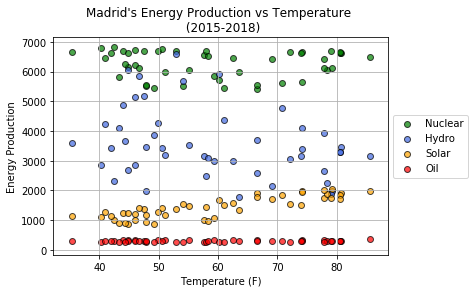

In [211]:
# Bar chart average energy production per month by temp (over 2015-2018)

# Plot each energy type
plt.scatter(madrid_weather_vs_engery_production["Temp (F)"],madrid_weather_vs_engery_production["Nuclear"], label="Nuclear", color="green", alpha=.7, edgecolors="black")
plt.scatter(madrid_weather_vs_engery_production["Temp (F)"],madrid_weather_vs_engery_production["Hydro River/Resivoir"], label="Hydro", color="royalblue", alpha=.7, edgecolors="black")
plt.scatter(madrid_weather_vs_engery_production["Temp (F)"],madrid_weather_vs_engery_production["Solar"], label="Solar", color="orange", alpha=.7, edgecolors="black")
plt.scatter(madrid_weather_vs_engery_production["Temp (F)"],madrid_weather_vs_engery_production["Oil"], label="Oil", color="red", alpha=.7, edgecolors="black")

plt.title("Madrid's Energy Production vs Temperature \n (2015-2018)")
plt.xlabel("Temperature (F)")
plt.ylabel("Energy Production")
plt.grid(axis="both")
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), fancybox=True)

plt.show

### Energy Production vs Seasons

In [23]:
# Average energy production by year by season
madrid_seasons = madrid_df.groupby(["Year","Season"])["Oil","Hydro River/Resivoir","Solar","Nuclear"].mean()
madrid_seasons

Oil  Hydro River/Resivoir        Solar      Nuclear
Year Season                                                              
2015 1-Spring  330.131519           3827.948299  1556.317007  6052.837188
     2-Summer  334.680380           3068.977396  1901.611212  6199.350814
     3-Fall    337.283575           3055.973230  1274.044465  6095.411525
     4-Winter  318.701347           3675.019972  1075.802601  6657.900604
2016 1-Spring  277.064703           5892.179830  1474.890228  6367.948237
     2-Summer  286.646286           3608.491848  1897.785326  6637.920290
     3-Fall    275.709195           3232.620326  1154.846458  6233.102068
     4-Winter  304.026556           4892.592512  1052.069221  6224.976926
2017 1-Spring  285.488064           2838.135721  1557.493811  6335.614058
     2-Summer  304.775456           2028.969764  1896.321032  6287.827034
     3-Fall    300.664709           1958.058292  1408.210122  5994.625395
     4-Winter  287.365854           2684.848096  1107.942234  6778.633718
2018 1-Spring  277.091603           5318.272689  1491.384648  5712.505513
     2-Summer  283.393531           3986.291554  1852.787511  6135.802336
     3-Fall    287.244463           3378.215503  1117.129898  6187.386286
     4-Winter  283.193824           3907.841934  1104.683462  6302.516863

<function matplotlib.pyplot.show(*args, **kw)>

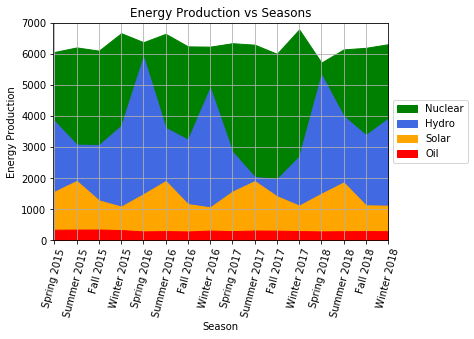

In [233]:
# Create bar chart with each season from each year
x_limit_season = np.arange(0,len(madrid_seasons),1)
season_names = ["Spring 2015","Summer 2015","Fall 2015","Winter 2015",
                "Spring 2016","Summer 2016","Fall 2016","Winter 2016",
                "Spring 2017","Summer 2017","Fall 2017","Winter 2017",
                "Spring 2018","Summer 2018","Fall 2018","Winter 2018",]

# Plot each energy type
plt.fill_between(x_limit_season,madrid_seasons["Nuclear"], color="green", label='Nuclear')
plt.fill_between(x_limit_season,madrid_seasons["Hydro River/Resivoir"], color="royalblue", label='Hydro')
plt.fill_between(x_limit_season,madrid_seasons["Solar"], color="orange", label='Solar')
plt.fill_between(x_limit_season,madrid_seasons["Oil"], color="red", label='Oil')
plt.grid(axis="both")
plt.xlim(0,0,1)
plt.ylim(0,7000)

plt.title("Energy Production vs Seasons")
plt.xlabel("Season")
plt.ylabel("Energy Production")
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), fancybox=True)

tick_locations = [value for value in x_limit_season]
plt.xticks(tick_locations, season_names, rotation=75)

# Show figure
plt.show

### Note:
Hydro Summer/Fall dip of 2017
https://elpais.com/elpais/2017/08/29/inenglish/1504014135_340158.html

<hr>

# Bilbao

In [152]:
# Create Dataframe for Bilbao
bilbao_df = smaller_better_big_df.loc[smaller_better_big_df["City"]=="Bilbao"]

# Preview
bilbao_df.head()

,Time,Month,Day,Year,Oil,Hydro River/Resivoir,Solar,Nuclear,City,Temp (F),Rain (mm),Snow (mm),Clouds,Weather Description,Season
2,2015-01-01 00:00:00+01:00,1,1,2015,162.0,2950.0,49.0,7096.0,Bilbao,25.71,0.0,0.0,0,clear,4-Winter
7,2015-01-01 01:00:00+01:00,1,1,2015,158.0,2667.0,50.0,7096.0,Bilbao,25.90,0.0,0.0,0,clear,4-Winter
12,2015-01-01 02:00:00+01:00,1,1,2015,157.0,2344.0,50.0,7099.0,Bilbao,24.98,0.0,0.0,0,clear,4-Winter
17,2015-01-01 03:00:00+01:00,1,1,2015,160.0,1728.0,50.0,7098.0,Bilbao,24.90,0.0,0.0,0,clear,4-Winter
22,2015-01-01 04:00:00+01:00,1,1,2015,156.0,1673.0,42.0,7097.0,Bilbao,25.40,0.0,0.0,0,clear,4-Winter


<hr>

# Barcelona

In [155]:
# Create Dataframe for Barcelona
barcelona_df = smaller_better_big_df.loc[smaller_better_big_df["City"]==" Barcelona"]
barcelona_df = barcelona_df.rename(columns={" Barcelona":"Barcelona"})

# Preview
barcelona_df.head()

,Time,Month,Day,Year,Oil,Hydro River/Resivoir,Solar,Nuclear,City,Temp (F),Rain (mm),Snow (mm),Clouds,Weather Description,Season
3,2015-01-01 00:00:00+01:00,1,1,2015,162.0,2950.0,49.0,7096.0,Barcelona,47.26,0.0,0.0,0,clear,4-Winter
8,2015-01-01 01:00:00+01:00,1,1,2015,158.0,2667.0,50.0,7096.0,Barcelona,47.26,0.0,0.0,0,clear,4-Winter
13,2015-01-01 02:00:00+01:00,1,1,2015,157.0,2344.0,50.0,7099.0,Barcelona,46.64,0.0,0.0,0,clear,4-Winter
18,2015-01-01 03:00:00+01:00,1,1,2015,160.0,1728.0,50.0,7098.0,Barcelona,46.64,0.0,0.0,0,clear,4-Winter
23,2015-01-01 04:00:00+01:00,1,1,2015,156.0,1673.0,42.0,7097.0,Barcelona,46.64,0.0,0.0,0,clear,4-Winter


In [214]:
weather_desc_Bar = barcelona_df.groupby("Weather Description")["Oil","Hydro River/Resivoir","Solar","Nuclear"].mean()
weather_desc_Bar

,Oil,Hydro River/Resivoir,Solar,Nuclear
Weather Description,,,,
clear,297.050176,3484.484405,1279.784852,6221.865405
clouds,301.050242,3625.599491,1636.706807,6276.316793
drizzle,289.667774,3888.780731,1128.544850,6351.172757
dust,280.500000,6549.500000,1753.500000,7104.500000
fog,286.959459,3800.581081,1484.608108,6473.391892
mist,293.293454,3166.907449,577.264108,6383.604966
rain,292.449610,3793.040716,1241.101646,6375.527866
snow,288.187500,6064.562500,884.750000,6981.812500
thunderstorm,288.485342,3208.674267,1389.045603,6145.319218


<function matplotlib.pyplot.show(*args, **kw)>

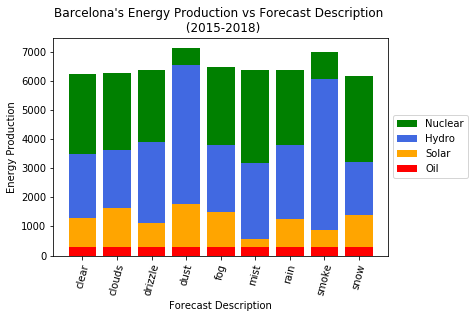

In [217]:
x_limit_desc_Bar = np.arange(0,len(weather_desc_Bar),1)
foreceast = ["clear","clouds","drizzle","dust","fog","mist","rain","smoke","snow","thunderstorm"]

# Plot each energy type
plt.bar(x_limit_desc_Bar,weather_desc_Bar["Nuclear"], color="green", label="Nuclear")
plt.bar(x_limit_desc_Bar,weather_desc_Bar["Hydro River/Resivoir"], color="royalblue", label="Hydro")
plt.bar(x_limit_desc_Bar,weather_desc_Bar["Solar"], color="orange", label="Solar")
plt.bar(x_limit_desc_Bar,weather_desc_Bar["Oil"], color="red", label="Oil")

plt.title("Barcelona's Energy Production vs Forecast Description \n (2015-2018)")
plt.xlabel("Forecast Description")
plt.ylabel("Energy Production")
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), fancybox=True)
tick_locations = [value for value in x_limit_desc_Bar]
plt.xticks(tick_locations, foreceast, rotation=75)

plt.show

<hr>

# Seville

In [234]:
# Create Dataframe for Seville
seville_df = smaller_better_big_df.loc[smaller_better_big_df["City"]=="Seville"]

# Preivew
seville_df.head()

,Time,Month,Day,Year,Oil,Hydro River/Resivoir,Solar,Nuclear,City,Temp (F),Rain (mm),Snow (mm),Clouds,Weather Description
4,2015-01-01 00:00:00+01:00,1,1,2015,162.0,2950.0,49.0,7096.0,Seville,32.40,0.0,0.0,0,clear
9,2015-01-01 01:00:00+01:00,1,1,2015,158.0,2667.0,50.0,7096.0,Seville,32.40,0.0,0.0,0,clear
14,2015-01-01 02:00:00+01:00,1,1,2015,157.0,2344.0,50.0,7099.0,Seville,33.68,0.0,0.0,0,clear
19,2015-01-01 03:00:00+01:00,1,1,2015,160.0,1728.0,50.0,7098.0,Seville,33.68,0.0,0.0,0,clear
24,2015-01-01 04:00:00+01:00,1,1,2015,156.0,1673.0,42.0,7097.0,Seville,33.68,0.0,0.0,0,clear


In [235]:
seville_weather_desc = seville_df.groupby("Weather Description")["Oil","Hydro River/Resivoir","Solar","Nuclear"].mean()
seville_weather_desc_nosqaull = seville_weather_desc
seville_weather_desc_nosqaull = seville_weather_desc_nosqaull.drop("squall", axis=0)
seville_weather_desc_nosqaull

,Oil,Hydro River/Resivoir,Solar,Nuclear
Weather Description,,,,
clear,299.314767,3408.631528,1531.918466,6259.625122
clouds,297.363536,3969.852762,1437.690193,6248.322790
drizzle,288.283951,4258.312757,885.786008,6092.308642
dust,321.026087,3684.663768,1490.208696,6591.828986
fog,286.520599,3742.001873,585.254682,6320.305243
haze,296.313218,3123.816092,325.772989,6287.712644
mist,289.608434,3781.025301,794.707229,6309.928916
rain,292.318885,4027.083591,950.476338,6299.499779
smoke,316.370370,3303.629630,379.666667,5739.074074


<function matplotlib.pyplot.show(*args, **kw)>

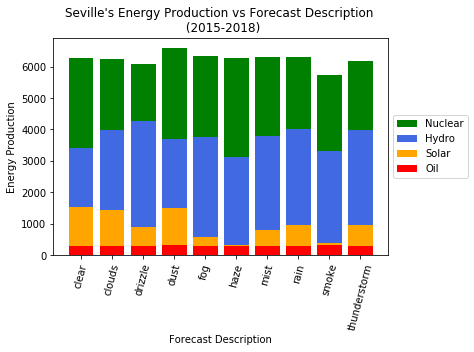

In [236]:
# Create weather description bar chart (no squall)
x_limit_seville = np.arange(0,len(seville_weather_desc_nosqaull),1)
foreceast = ["clear","clouds","drizzle","dust","fog","haze","mist","rain","smoke","thunderstorm"]

# Plot each energy type
plt.bar(x_limit_seville,seville_weather_desc_nosqaull["Nuclear"], color="green", label="Nuclear")
plt.bar(x_limit_seville,seville_weather_desc_nosqaull["Hydro River/Resivoir"], color="royalblue", label="Hydro")
plt.bar(x_limit_seville,seville_weather_desc_nosqaull["Solar"], color="orange", label="Solar")
plt.bar(x_limit_seville,seville_weather_desc_nosqaull["Oil"], color="red", label="Oil")

plt.title("Seville's Energy Production vs Forecast Description \n (2015-2018)")
plt.xlabel("Forecast Description")
plt.ylabel("Energy Production")
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), fancybox=True)
tick_locations = [value for value in x_limit_seville]
plt.xticks(tick_locations, foreceast, rotation=75)

plt.show

<hr>

## Valencia

In [232]:
# Create Dataframe for Valencia
valencia_df = smaller_better_big_df.loc[smaller_better_big_df["City"]=="Valencia"]

# Preivew
# valencia_df.head()